In [1]:
%load_ext autoreload
%autoreload 2

In [57]:
import keras
import pandas as pd
import os
import importlib
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics
from keras.callbacks import History
import seaborn as sns

try:
    os.chdir('py')
except FileNotFoundError:
    pass
import small
from small import Splits as S
from small import relu
_ = importlib.reload(small)

In [87]:
sns.set()
sns.set_style("whitegrid")

In [74]:
handler = small.AbaloneHandler()
df = handler.read()
datasets = handler.split_and_apply_transforms(df)

In [79]:
keras.backend.clear_session()
start_dim = datasets[S.trn]['X'].shape[1] - 1
end_dim = 1
model = keras.Sequential([
    relu(dim) for dim in range(start_dim, end_dim - 1, -2)
])
model.compile(optimizer='adam', loss=keras.losses.MeanSquaredError())

In [82]:
epochs = 1000
batch_size = 16 * 4
history = model.fit(
    datasets[S.trn]['X'], datasets[S.trn]['y'], 
    epochs=epochs, batch_size=batch_size, 
    callbacks=[History()], verbose=0,
    validation_data=(datasets[S.val]['X'], datasets[S.val]['y']))

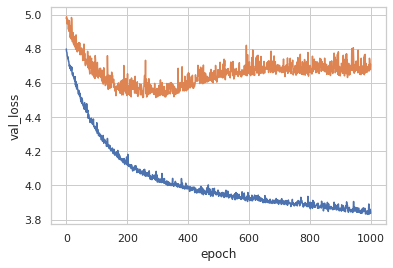

In [88]:
loss_df = pd.DataFrame(history.history)
loss_df['epoch'] = range(loss_df.shape[0])
_ = sns.lineplot(x='epoch', y='loss', data=loss_df)
_ = sns.lineplot(x='epoch', y='val_loss', data=loss_df)

In [85]:
linreg = {}
linreg['model'] = LinearRegression().fit(datasets[S.trn]['X'], datasets[S.trn]['y'])
linreg['pred'] = linreg['model'].predict(datasets[S.val]['X'])
sklearn.metrics.mean_squared_error(linreg['pred'], datasets[S.val]['y'])

4.863866282158875

In [86]:
nn_pred = model.predict(datasets[S.val]['X'])
sklearn.metrics.mean_squared_error(nn_pred, datasets[S.val]['y'])

4.709282724550098